<h1>Data Exploration</h1>
<p>In this notebook we will perform a broad data exploration on the <code>Caravan</code> data set. Note that the aim of this exploration is not to be completely thorough; instead we would like to gain quick insights to help develop a first prototype. Upon analyzing the output of the prototype, we can analyze the data further to gain more insight.</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%run ../../customModules/DataQualityReports.ipynb
# https://stackoverflow.com/questions/34398054/ipython-notebook-cell-multiple-outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<p>We first read the comma-separated values (csv) <code>Caravan</code> file into a pandas DataFrame. To get a feeling for the data we display the top five rows of the DataFrame using the <code>head()</code> method and we show how many rows and columns the DataFrame has by using the <code>shape</code> attribute. We also show the <code>dtypes</code> attribute, which returns a pandas Series with the data type of each column.</p>

In [2]:
df = pd.read_csv("Caravan.csv", index_col = 0)
df.head()
df.shape
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df.dtypes)

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
1,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
3,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
4,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
5,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No


(5822, 86)

MOSTYPE      int64
MAANTHUI     int64
MGEMOMV      int64
MGEMLEEF     int64
MOSHOOFD     int64
MGODRK       int64
MGODPR       int64
MGODOV       int64
MGODGE       int64
MRELGE       int64
MRELSA       int64
MRELOV       int64
MFALLEEN     int64
MFGEKIND     int64
MFWEKIND     int64
MOPLHOOG     int64
MOPLMIDD     int64
MOPLLAAG     int64
MBERHOOG     int64
MBERZELF     int64
MBERBOER     int64
MBERMIDD     int64
MBERARBG     int64
MBERARBO     int64
MSKA         int64
MSKB1        int64
MSKB2        int64
MSKC         int64
MSKD         int64
MHHUUR       int64
MHKOOP       int64
MAUT1        int64
MAUT2        int64
MAUT0        int64
MZFONDS      int64
MZPART       int64
MINKM30      int64
MINK3045     int64
MINK4575     int64
MINK7512     int64
MINK123M     int64
MINKGEM      int64
MKOOPKLA     int64
PWAPART      int64
PWABEDR      int64
PWALAND      int64
PPERSAUT     int64
PBESAUT      int64
PMOTSCO      int64
PVRAAUT      int64
PAANHANG     int64
PTRACTOR     int64
PWERKT      

<p>We check to see if any values are missing in the DataFrame using its <code>isnull</code> method.</p>

In [3]:
df.reset_index()[df.reset_index().isnull().any(axis=1)]
df[df.isnull().any(axis=1)].shape

,index,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase


(0, 86)

<p>There are no obvious missing values in our data. So the next step to be able to produce the data quality reports with our custom <code>createDataQualityReports</code> function is to organize our DataFrame by quantitative and categorical variables using hierarchical indexing.</p>

In [4]:
# http://liacs.leidenuniv.nl/~puttenpwhvander/library/cc2000/data.html
categorical_features = [
    'MOSTYPE',
    'MOSHOOFD',
    'Purchase',
]
tuples = [('categorical', column) if column in categorical_features else ('quantitative', column) for column in df.columns]

df.columns = pd.MultiIndex.from_tuples(tuples, names=['type of variable', 'variable'])
df.sort_index(axis=1, level='type of variable', inplace=True)
df.head()

type of variable categorical                  quantitative                 \
variable            MOSHOOFD MOSTYPE Purchase     AAANHANG ABESAUT ABRAND   
1                          8      33       No            0       0      1   
2                          8      37       No            0       0      1   
3                          8      37       No            0       0      1   
4                          3       9       No            0       0      1   
5                         10      40       No            0       0      1   

type of variable                                ...                    \
variable         ABROM ABYSTAND AFIETS AGEZONG  ... PPERSONG PPLEZIER   
1                    0        0      0       0  ...        0        0   
2                    0        0      0       0  ...        0        0   
3                    0        0      0       0  ...        0        0   
4                    0        0      0       0  ...        0        0   
5                    0        0      0       0  ...        0        0   

type of variable                                                          \
variable         PTRACTOR PVRAAUT PWABEDR PWALAND PWAOREG PWAPART PWERKT   
1                       0       0       0       0       0       0      0   
2                       0       0       0       0       0       2      0   
3                       0       0       0       0       0       2      0   
4                       0       0       0       0       0       0      0   
5                       0       0       0       0       0       0      0   

type of variable          
variable         PZEILPL  
1                      0  
2                      0  
3                      0  
4                      0  
5                      0  

[5 rows x 86 columns]

<p>Now we can create the data quality reports.</p>

In [5]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    df_qr_quantitative, df_qr_categorical = createDataQualityReports(df)
    'Quantitative Qualilty Report:'
    display(df_qr_quantitative.round(2))
    'Categorical Qualilty Report:'
    display(df_qr_categorical.round(2))

'Quantitative Qualilty Report:'

,Count,Miss. (%),Card.,Min.,1st Qrt.,Mean,Median,3rd Qrt.,Max.,Std. Dev.
variable,,,,,,,,,,
AAANHANG,5822,0.0,4,0,0.0,0.01,0.0,0.0,3,0.13
ABESAUT,5822,0.0,5,0,0.0,0.01,0.0,0.0,4,0.13
ABRAND,5822,0.0,7,0,0.0,0.57,1.0,1.0,7,0.56
ABROM,5822,0.0,3,0,0.0,0.07,0.0,0.0,2,0.27
ABYSTAND,5822,0.0,3,0,0.0,0.01,0.0,0.0,2,0.12
AFIETS,5822,0.0,4,0,0.0,0.03,0.0,0.0,3,0.21
AGEZONG,5822,0.0,2,0,0.0,0.01,0.0,0.0,1,0.08
AINBOED,5822,0.0,3,0,0.0,0.01,0.0,0.0,2,0.09
ALEVEN,5822,0.0,6,0,0.0,0.08,0.0,0.0,8,0.38


'Categorical Qualilty Report:'

,Count,Miss. (%),Card.,Mode,Mode Freq.,Mode (%),2nd Mode,2nd Mode Freq.,2nd Mode (%)
variable,,,,,,,,,
MOSHOOFD,5822,0.0,10,8,1563,26.85,3,886,15.22
MOSTYPE,5822,0.0,40,33,810,13.91,8,339,5.82
Purchase,5822,0.0,2,No,5474,94.02,Yes,348,5.98


<p>To further gain insight into the data, we use the <code>plotQuantitativeVariables</code> and <code>plotCategoricalVariables</code> functions the produce the frequency plots for each (quantitative) variable.</p>

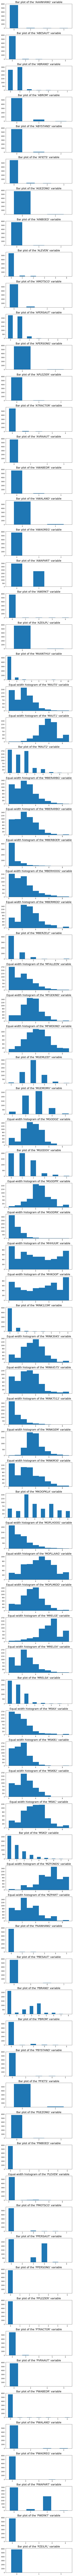

In [6]:
plotQuantitativeVariables(df.xs('quantitative', axis=1), height=3, width=7)

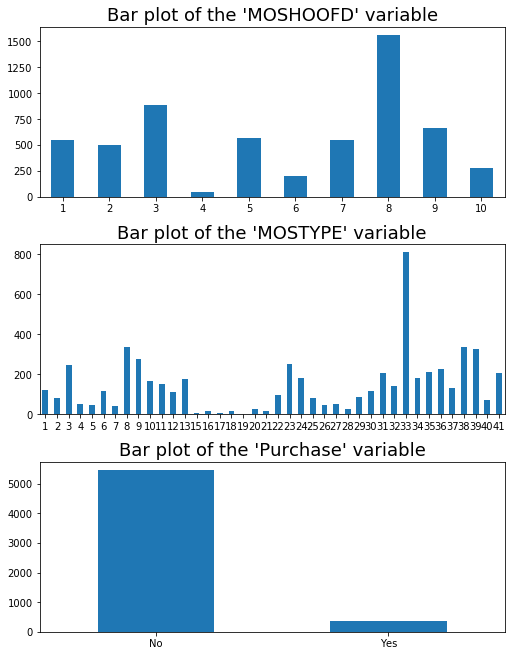

In [7]:
plotCategoricalVariables(df.xs('categorical', axis=1), height=3, width=7)

<p>We also compute the correlation matrix of the variables.</p>

In [8]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)